In [60]:
import pandas as pd

In [61]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/data_cleaned_ty1.csv')

In [62]:
data_stemmed = pd.read_csv('/content/drive/MyDrive/data_stemmed_ty1.csv')

In [63]:
data = data_cleaned

In [64]:
data['stemmed_reviews'] = data_stemmed['reviews']

In [65]:
data.head(10)

,reviews,rating,recommendation,stemmed_reviews
0,elbise görseldekinin birebir aynısı geldi her ...,5,1,elbise görsel birebir aynı gel kadın dol...
1,beden aldım cici bir,5,1,beden al cici bir
2,güzel bir elbise tam bir fiyat performans ürün...,5,1,güzel bir elbise tam bir fiyat performan...
3,kesinlikle güzel bir elbise beden alınız boy k...,5,1,kesinlikle güzel bir elbise beden al boy...
4,güzel bir elbise kızım kuzeninin nişanında giy...,5,1,güzel bir elbise kız kuzen nişanın gi s...
5,boy kiloyum minnoş elbise bayıldım çizmeyle ko...,5,1,boy kilo minnoş elbise bay çizme kombinl...
6,mükemmel kalıp bayıldım i̇yiki yorumlara güven...,5,1,mükemmel kalıp bay i̇yi yorum güven bir ...
7,elbise harika bayıldım şık güzel boy kiloyum b...,5,1,elbise harika bay şık güzel boy kilo be...
8,çok asil zarif bir elbise belde taba kemerle s...,5,1,çok asil zarif bir elbise bel taba keme...
9,elbiseye bayıldım kiloyum yorumlara bakarak be...,5,1,elbise bay kilo yorum bak beden al i̇yi...


In [87]:
with open('/content/drive/MyDrive/sw.txt', encoding='utf-8') as f:
  stop_words = f.read().split()

In [88]:
def tokenize_review(reviews):
  result = []
  for i in range(len(reviews)):
    if type(reviews[i]) is not float:
      a = reviews[i].split(' ')
      review_list = []
      for word in a:
        if word != '' and len(word)>2 and word not in stop_words:
          review_list.append(word)
      review = ''
      if review_list:
        for j in review_list:
          review += j + ' '
        review = review[:-1]
      result.append(review)
      
    else:
      result.append(' ')
      
  return result
    

In [89]:
data['stemmed_tokenized_reviews'] = tokenize_review(data['stemmed_reviews']) 

In [90]:
data['stemmed_tokenized_reviews'].head(10)

0    elbise görsel birebir aynı gel kadın dolap ger...
1                                           beden cici
2    güzel elbise tam fiyat performans ürün diğer b...
3     kesinlikle güzel elbise beden boy kilo beden iyi
4    güzel elbise kız kuzen nişanın spor şık elbise...
5    boy kilo minnoş elbise bay çizme kombinle sev ...
6    mükemmel kalıp bay i̇yi güven beden normal göğ...
7    elbise harika bay şık güzel boy kilo beden güz...
8    çok asil zarif elbise bel taba kemer süper dur...
9    elbise bay kilo bak beden i̇yi öyle döküm dur ...
Name: stemmed_tokenized_reviews, dtype: object

In [91]:
def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].items():
        if isinstance(col, float):
            continue
        for word in col.split(' '):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]


In [92]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [93]:
def plot_world_cloud(df, column, nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#424342',
                           colormap='Set3',
                           random_state=4
                           # mask=mask
                           )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("Word Cloud for the column {} (top {}) \n".format(
        column, nb_top))
    plt.show()

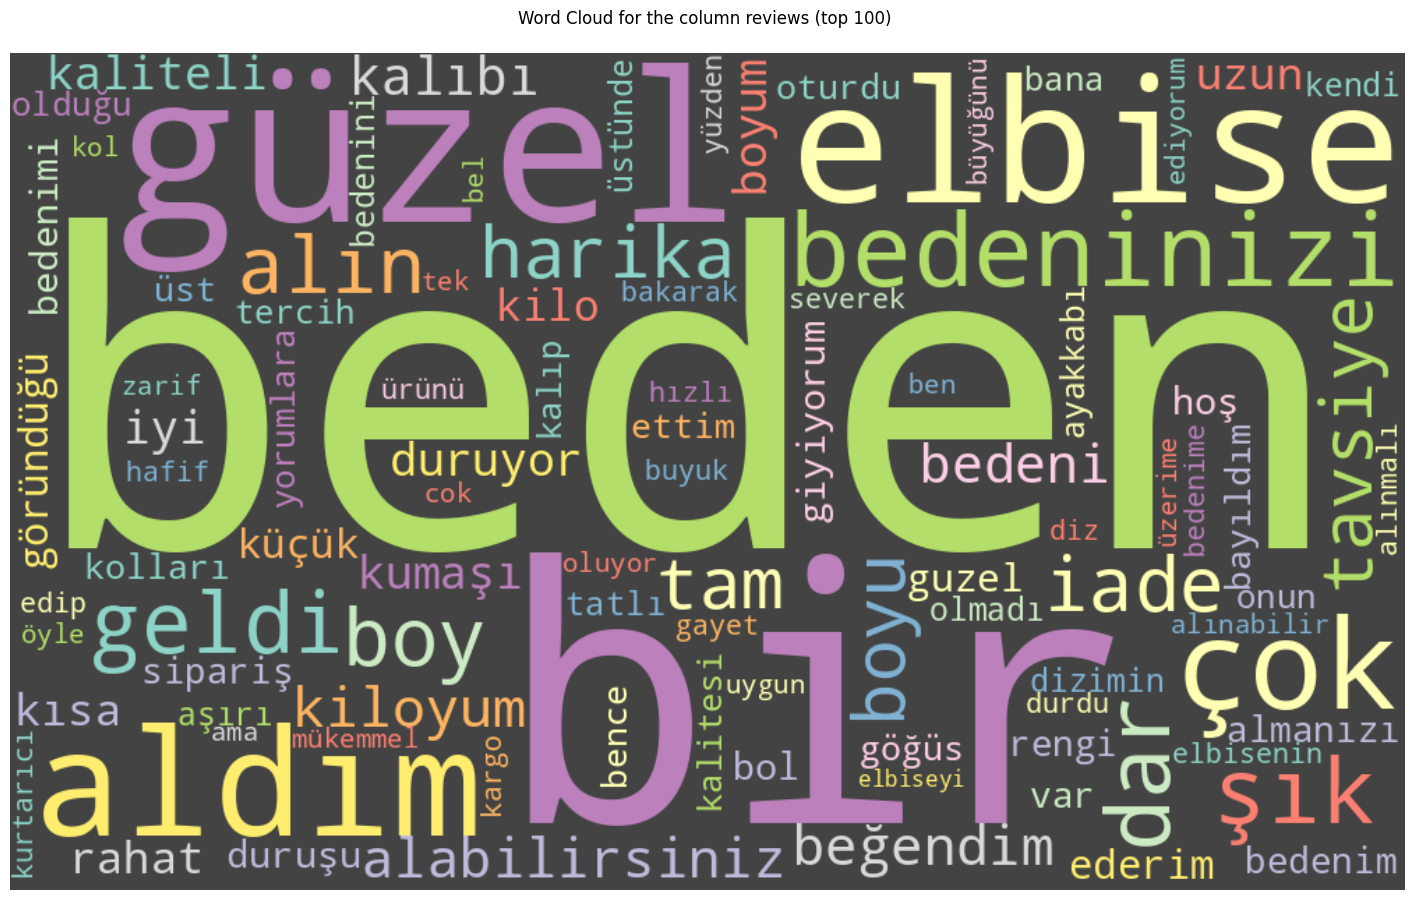

In [94]:
plot_world_cloud(df=data, column='reviews', nb_top=100)

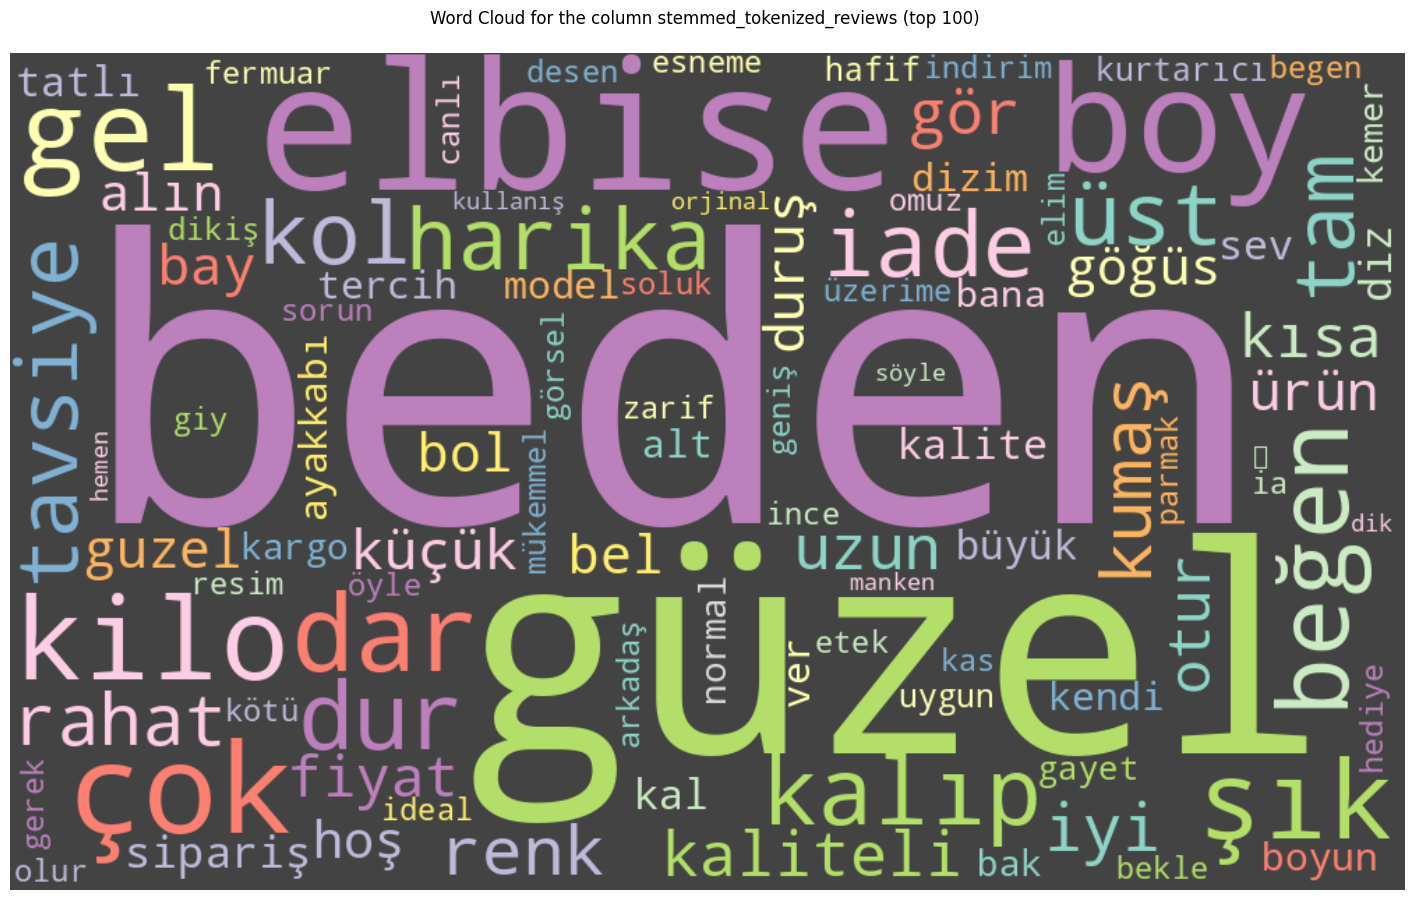

In [95]:
plot_world_cloud(df=data, column='stemmed_tokenized_reviews', nb_top=100)

In [120]:
def word_by_word(reviews):
  result = []
  for i in range(len(reviews)):
    if type(reviews[i]) is not float:
      a = reviews[i].split(' ')
      review_list = []
      for word in a:
        if word != '':
          review_list.append(word)
      result.append(review_list)
  return result

In [121]:
def possibleMatches(x):
    letters = 'ouığşç'
    letters_change = {'o': 'ö', 'ı': 'i', 'ğ': 'k', 'ş': 's', 'ç': 'c', 'u': 'ü'}
    words = []
    for i in range(len(x)):
        if x[i] in letters:
            new = x[:i]
            new += letters_change[x[i]]
            new += x[i+1:]
            words.append(new)
            s = []
            for w in words:
                if w != new and x[i] in w:
                    a = w.replace(x[i], letters_change[x[i]], 1)
                    s.append(a)
            if s:
                for j in s:
                    words.append(j)

    words.append(x)
    return words

In [122]:
word_dict = {}

In [123]:
def update_dict(listE, x):
    for i in listE:
        if i not in word_dict[x]:
            word_dict[x].append(i)
        else:
            continue

In [124]:
def control_dict(listE):
    for j in listE:
        if j in word_dict:
            update_dict(listE, j)
            return j
        else:
            continue
    return False

In [125]:
data_re = word_by_word(data['stemmed_tokenized_reviews'])

In [ ]:
data_re[:3]

In [ ]:
list_last = []
for review in data_re:
    result = []
    for word in review:
        t = ''
        possibles = possibleMatches(word)
        if control_dict(possibles) is not False:
          t += str(control_dict(possibles)) + ' '
        else:
          t += word + ' '
          word_dict[str(word)] = possibles
      
        result.append(t)
    list_last.append(result)
      
    


list_last

In [131]:
reviews  = []
for review in list_last:
  t = ''
  for i in review:
    t += i + ' '
  t = t[:-1]
  reviews.append(t)

In [132]:
data['last'] = reviews

In [133]:
data.head(10)

,reviews,rating,recommendation,stemmed_reviews,stemmed_tokenized_reviews,last
0,elbise görseldekinin birebir aynısı geldi her ...,5,1,elbise görsel birebir aynı gel kadın dol...,elbise görsel birebir aynı gel kadın dolap ger...,elbise görsel birebir aynı gel kadın dol...
1,beden aldım cici bir,5,1,beden al cici bir,beden cici,beden cici
2,güzel bir elbise tam bir fiyat performans ürün...,5,1,güzel bir elbise tam bir fiyat performan...,güzel elbise tam fiyat performans ürün diğer b...,güzel elbise tam fiyat performans ürün d...
3,kesinlikle güzel bir elbise beden alınız boy k...,5,1,kesinlikle güzel bir elbise beden al boy...,kesinlikle güzel elbise beden boy kilo beden iyi,kesinlikle güzel elbise beden boy kilo b...
4,güzel bir elbise kızım kuzeninin nişanında giy...,5,1,güzel bir elbise kız kuzen nişanın gi s...,güzel elbise kız kuzen nişanın spor şık elbise...,güzel elbise kız kuzen nişanın spor şık ...
5,boy kiloyum minnoş elbise bayıldım çizmeyle ko...,5,1,boy kilo minnoş elbise bay çizme kombinl...,boy kilo minnoş elbise bay çizme kombinle sev ...,boy kilo minnoş elbise bay çizme kombinl...
6,mükemmel kalıp bayıldım i̇yiki yorumlara güven...,5,1,mükemmel kalıp bay i̇yi yorum güven bir ...,mükemmel kalıp bay i̇yi güven beden normal göğ...,mükemmel kalıp bay i̇yi güven beden norm...
7,elbise harika bayıldım şık güzel boy kiloyum b...,5,1,elbise harika bay şık güzel boy kilo be...,elbise harika bay şık güzel boy kilo beden güz...,elbise harika bay şık güzel boy kilo be...
8,çok asil zarif bir elbise belde taba kemerle s...,5,1,çok asil zarif bir elbise bel taba keme...,çok asil zarif elbise bel taba kemer süper dur...,çok asil zarif elbise bel taba kemer sü...
9,elbiseye bayıldım kiloyum yorumlara bakarak be...,5,1,elbise bay kilo yorum bak beden al i̇yi...,elbise bay kilo bak beden i̇yi öyle döküm dur ...,elbise bay kilo bak beden i̇yi öyle dök...


In [ ]:
word_dict

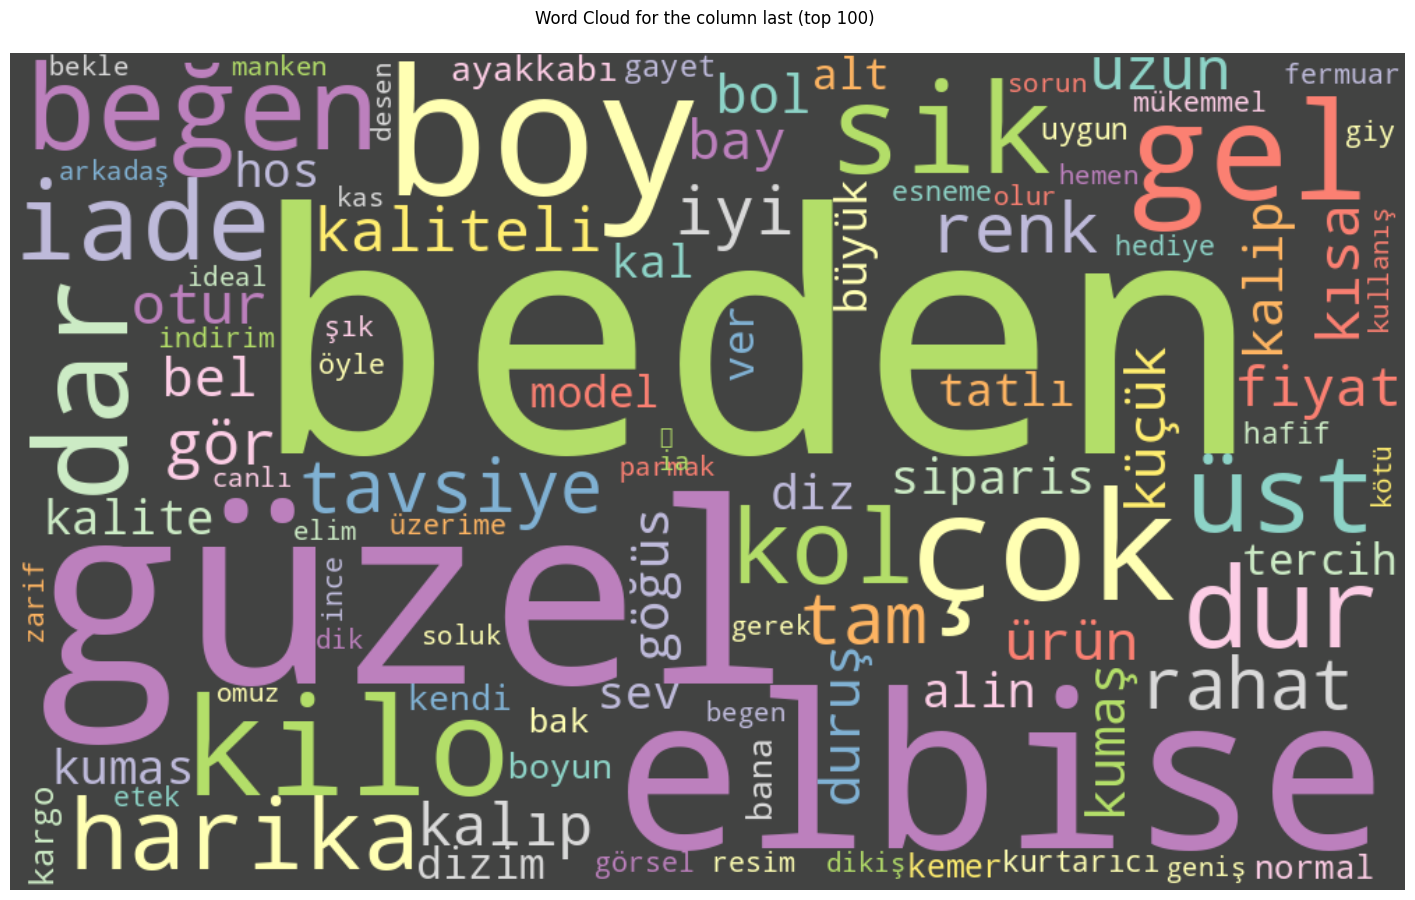

In [138]:
plot_world_cloud(df=data, column='last', nb_top=100)